In [1]:

# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import warnings
warnings.filterwarnings('ignore')

# 폰트 설정 (Colab/로컬 환경 모두 지원)
import matplotlib.pyplot as plt
import os
import sys

def set_korean_font():
    try:
        # Colab 환경 (나눔고딕)
        import matplotlib.font_manager as fm
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        if os.path.exists(font_path):
            plt.rcParams['font.family'] = 'NanumGothic'
            return
    except:
        pass
    # macOS
    if sys.platform == 'darwin':
        plt.rcParams['font.family'] = 'AppleGothic'
    # Windows
    elif sys.platform.startswith('win'):
        plt.rcParams['font.family'] = 'Malgun Gothic'
    # 기타(리눅스 등)
    else:
        plt.rcParams['font.family'] = 'DejaVu Sans'

set_korean_font()
plt.rcParams['axes.unicode_minus'] = False


zsh:1: command not found: apt-get
zsh:1: command not found: apt-get
zsh:1: command not found: apt-get
zsh:1: command not found: fc-cache
zsh:1: command not found: fc-cache
rm: /Users/hanhyegyeong/.cache/matplotlib: No such file or directory
rm: -rf: No such file or directory
rm: /Users/hanhyegyeong/.cache/matplotlib: No such file or directory
rm: -rf: No such file or directory


평균 임대료가 가장 높은 상위 3개 지역: ['수원시', '부천시', '안양시']


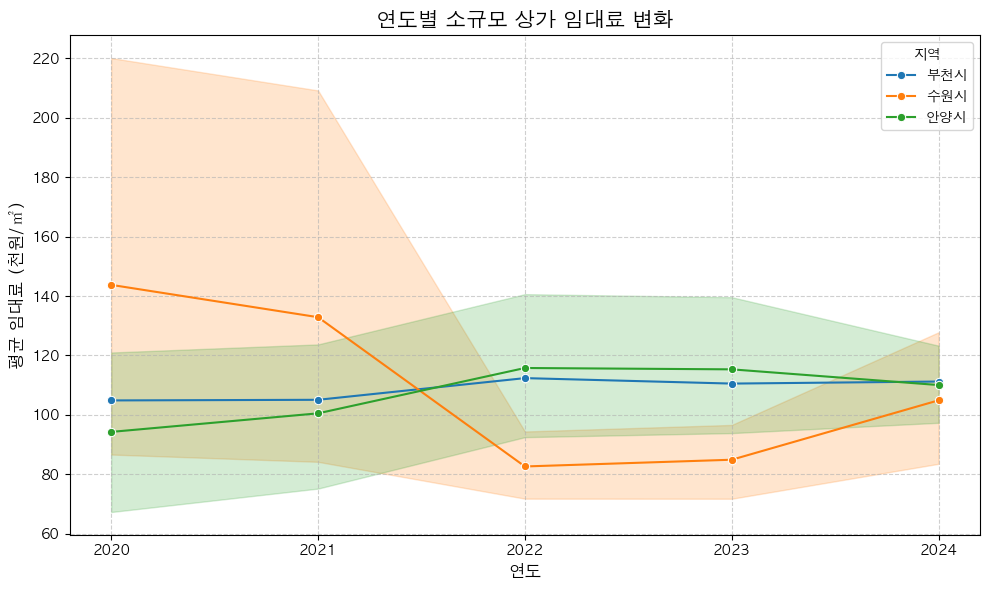

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. 데이터 로드 (이미지 데이터를 CSV 파일로 가정)
# 실제 파일 경로에 맞게 수정해주세요.
# 예시: rent_data.csv
df_rent = pd.read_csv('../../data/processed/rent_small.csv', encoding='cp949') # 파일명은 예시입니다. 실제 파일명으로 변경하세요.

# 2. 데이터 전처리
# '지역(추출)' 컬럼을 'region'으로 변경하고 공백 제거 및 '시' 붙이기
df_rent.rename(columns={'지역(추출)': 'region'}, inplace=True)
df_rent['region'] = df_rent['region'].astype(str).str.strip() + '시'

# 연도 컬럼 추출 및 데이터 타입 변환
# '2020년', '2021년' 등의 컬럼을 숫자로 변환
year_cols = [col for col in df_rent.columns if '년' in col]

# melt를 사용하여 연도별 데이터를 long format으로 변환
df_long = df_rent.melt(
    id_vars=['region'],
    value_vars=year_cols,
    var_name='year',
    value_name='rent_price'
)

# 'year' 컬럼에서 숫자만 추출하여 정수형으로 변환
df_long['year'] = df_long['year'].str.extract(r'(\d{4})').astype(int)

# 'rent_price' 컬럼을 숫자형으로 변환 (오류가 있는 값은 NaN으로 처리)
df_long['rent_price'] = pd.to_numeric(df_long['rent_price'], errors='coerce')

# 결측치 제거 (임대료 데이터가 없는 경우)
df_long.dropna(subset=['rent_price'], inplace=True)


# 3. 지역별 평균 임대료 계산
# 각 지역의 전체 기간 평균 임대료를 계산하여 정렬
region_avg_rent = df_long.groupby('region')['rent_price'].mean().sort_values(ascending=False)

# 4. 가장 높은 상위 3개 지역 선택
top_3_regions = region_avg_rent.head(3).index.tolist()
print(f"평균 임대료가 가장 높은 상위 3개 지역: {top_3_regions}")

# 상위 3개 지역의 데이터만 필터링
df_top3 = df_long[df_long['region'].isin(top_3_regions)].copy()

# 시계열 그래프를 위해 연도별로 정렬
df_top3.sort_values(by=['region', 'year'], inplace=True)

# 5. 시계열 그래프 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top3, x='year', y='rent_price', hue='region', marker='o')

plt.title('연도별 소규모 상가 임대료 변화', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('평균 임대료 (천원/㎡)', fontsize=12)
plt.xticks(df_top3['year'].unique()) # 모든 연도 표시
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='지역')
plt.tight_layout()
plt.show()

평균 임대료가 가장 높은 상위 3개 지역: ['수원시', '안양시', '안산시']


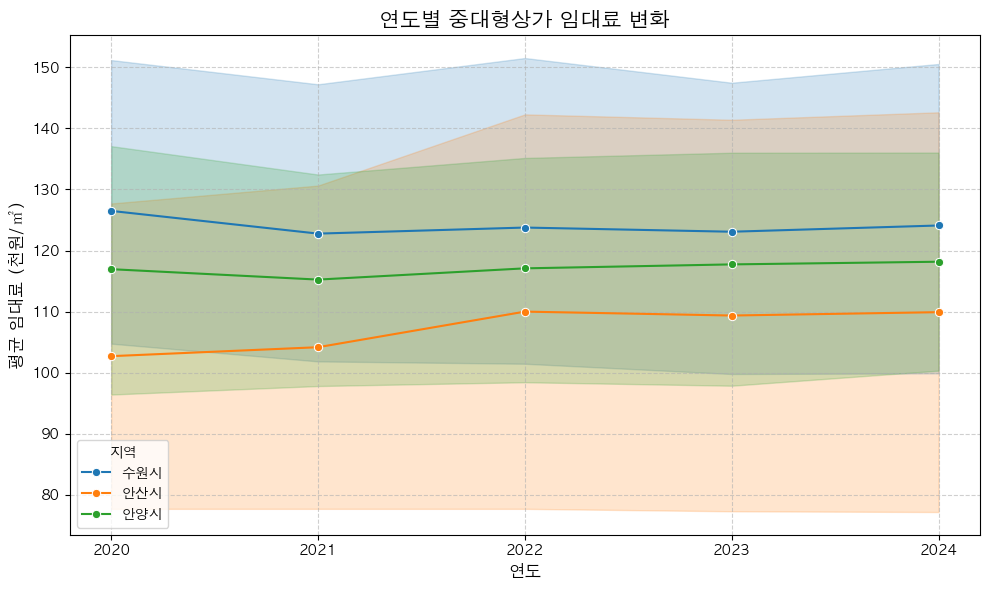

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. 데이터 로드 (이미지 데이터를 CSV 파일로 가정)
# 실제 파일 경로에 맞게 수정해주세요.
# 예시: rent_data.csv
df_rent = pd.read_csv('../../data/processed/rent_mid_big.csv', encoding='cp949') # 파일명은 예시입니다. 실제 파일명으로 변경하세요.

# 2. 데이터 전처리
# '지역(추출)' 컬럼을 'region'으로 변경하고 공백 제거 및 '시' 붙이기
df_rent.rename(columns={'지역(추출)': 'region'}, inplace=True)
df_rent['region'] = df_rent['region'].astype(str).str.strip() + '시'

# 연도 컬럼 추출 및 데이터 타입 변환
# '2020년', '2021년' 등의 컬럼을 숫자로 변환
year_cols = [col for col in df_rent.columns if '년' in col]

# melt를 사용하여 연도별 데이터를 long format으로 변환
df_long = df_rent.melt(
    id_vars=['region'],
    value_vars=year_cols,
    var_name='year',
    value_name='rent_price'
)

# 'year' 컬럼에서 숫자만 추출하여 정수형으로 변환
df_long['year'] = df_long['year'].str.extract(r'(\d{4})').astype(int)

# 'rent_price' 컬럼을 숫자형으로 변환 (오류가 있는 값은 NaN으로 처리)
df_long['rent_price'] = pd.to_numeric(df_long['rent_price'], errors='coerce')

# 결측치 제거 (임대료 데이터가 없는 경우)
df_long.dropna(subset=['rent_price'], inplace=True)


# 3. 지역별 평균 임대료 계산
# 각 지역의 전체 기간 평균 임대료를 계산하여 정렬
region_avg_rent = df_long.groupby('region')['rent_price'].mean().sort_values(ascending=False)

# 4. 가장 높은 상위 3개 지역 선택
top_3_regions = region_avg_rent.head(3).index.tolist()
print(f"평균 임대료가 가장 높은 상위 3개 지역: {top_3_regions}")

# 상위 3개 지역의 데이터만 필터링
df_top3 = df_long[df_long['region'].isin(top_3_regions)].copy()

# 시계열 그래프를 위해 연도별로 정렬
df_top3.sort_values(by=['region', 'year'], inplace=True)

# 5. 시계열 그래프 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top3, x='year', y='rent_price', hue='region', marker='o')

plt.title('연도별 중대형상가 임대료 변화', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('평균 임대료 (천원/㎡)', fontsize=12)
plt.xticks(df_top3['year'].unique()) # 모든 연도 표시
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='지역')
plt.tight_layout()
plt.show()